In [2]:
import pandas as pd
import numpy as np

file_url = "/content/drive/MyDrive/GDSC_dataset/df4.csv"
df4 = pd.read_csv(file_url)
df4

,Km_value (mM),MolMR,RingCount,AromaticRings,SMR_VSA3,PEOE_VSA2,PEOE_VSA3,PEOE_VSA7,RotatableBonds,NumHeterocycles,...,HBD,AACount_Y,AACount_N,instability_index,PEOE_VSA12,num_residues,hb_potential,AACount_H,AACount_W,PEOE_VSA10
0,1.955096,-0.690937,-1.026710,-0.892858,-0.754809,-1.081911,-0.730910,-0.287047,0.084619,-0.808821,...,-1.217787,-0.917324,-0.332136,-1.508849,-0.583842,-0.153694,0.0,-0.551634,-0.733712,-0.641318
1,-0.679248,1.522981,1.953387,1.060345,1.742812,1.135634,1.614112,-0.287047,1.188215,2.259273,...,1.174630,-0.111844,-0.332136,-0.512979,0.836002,-0.247590,144.0,-0.423128,-0.733712,1.780429
2,-0.707338,1.522981,1.953387,1.060345,1.742812,1.135634,1.614112,-0.287047,1.188215,2.259273,...,1.174630,-0.111844,-0.332136,-0.512979,0.836002,-0.247590,144.0,-0.423128,-0.733712,1.780429
3,-0.688611,-0.855467,-0.430690,0.083743,-0.754809,-0.504366,-0.730910,-0.859349,-1.018977,-0.808821,...,-1.217787,-0.111844,-0.332136,-0.512979,-0.583842,-0.247590,0.0,-0.423128,-0.733712,-0.641318
4,-0.688611,-0.914653,-0.430690,-0.892858,-0.754809,-1.081911,-0.730910,0.285255,-1.239696,-0.808821,...,-0.918735,-0.111844,-0.332136,-0.512979,-0.583842,-0.247590,1.0,-0.423128,-0.733712,-1.002222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5582,-0.667076,0.520493,0.761349,1.060345,1.241639,0.013163,2.058640,-0.859349,0.526058,1.032035,...,0.875577,2.282222,2.287469,0.450235,-0.583842,2.364982,98.0,2.307611,2.318064,0.729100
5583,-0.645540,2.291370,0.761349,1.060345,2.329264,2.407791,2.058640,-0.859349,2.512530,1.032035,...,1.473682,-0.111844,-0.095781,0.129818,2.255845,0.357518,171.0,0.733420,-0.937163,1.079543
5584,-0.619323,2.391185,0.761349,1.060345,2.329264,2.407791,2.058640,-0.287047,2.512530,1.032035,...,1.473682,-0.111844,-0.095781,0.129818,2.255845,0.357518,171.0,0.733420,-0.937163,1.079543
5585,-0.713143,0.520493,0.761349,1.060345,1.241639,0.013163,2.058640,-0.859349,0.526058,1.032035,...,0.875577,-0.425086,-0.253351,-0.478601,-0.583842,-0.597092,98.0,-0.937150,-0.326808,0.729100


In [3]:
df4['pKm_value'] = np.log10(np.abs(df4['Km_value (mM)']))

In [4]:
from scipy.stats import shapiro
stat, p = shapiro(df4.loc[:,'pKm_value'])
print('stat={0:.3f}, p={0:.3f}' .format(stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')


stat=0.812, p=0.812
Probably not Gaussian


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5587.
  res = hypotest_fun_out(*samples, **kwds)


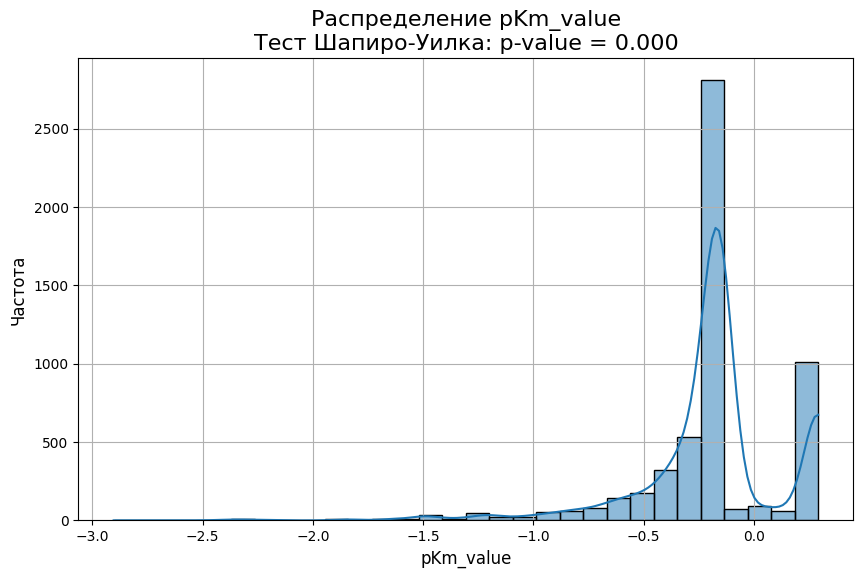

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df4['pKm_value'], kde=True, bins=30) # kde=True рисует сглаженную линию

plt.title(f'Распределение pKm_value\nТест Шапиро-Уилка: p-value = {p:.3f}', fontsize=16)
plt.xlabel('pKm_value', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.grid(True)
plt.show()

Визуализировали распределение pKm_value

In [6]:
for col in df4.columns:
  stat, p = shapiro(df4[col])
  print('stat={0:.3f}, p={0:.3f}' .format(stat, p))
  if p > 0.05:
      print('Probably Gaussian')
  else:
      print('Probably not Gaussian')

stat=0.686, p=0.686
Probably not Gaussian
stat=0.917, p=0.917
Probably not Gaussian
stat=0.870, p=0.870
Probably not Gaussian
stat=0.802, p=0.802
Probably not Gaussian
stat=0.757, p=0.757
Probably not Gaussian
stat=0.874, p=0.874
Probably not Gaussian
stat=0.730, p=0.730
Probably not Gaussian
stat=0.801, p=0.801
Probably not Gaussian
stat=0.896, p=0.896
Probably not Gaussian
stat=0.783, p=0.783
Probably not Gaussian
stat=0.664, p=0.664
Probably not Gaussian
stat=0.859, p=0.859
Probably not Gaussian
stat=0.770, p=0.770
Probably not Gaussian
stat=0.898, p=0.898
Probably not Gaussian
stat=0.907, p=0.907
Probably not Gaussian
stat=0.823, p=0.823
Probably not Gaussian
stat=0.655, p=0.655
Probably not Gaussian
stat=0.788, p=0.788
Probably not Gaussian
stat=0.896, p=0.896
Probably not Gaussian
stat=0.635, p=0.635
Probably not Gaussian
stat=0.693, p=0.693
Probably not Gaussian
stat=0.482, p=0.482
Probably not Gaussian
stat=0.688, p=0.688
Probably not Gaussian
stat=0.919, p=0.919
Probably not G

/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5587.
  res = hypotest_fun_out(*samples, **kwds)


--- Построение зависимости 'pKm_value' от дескрипторов (цвет по 'Temperature') ---


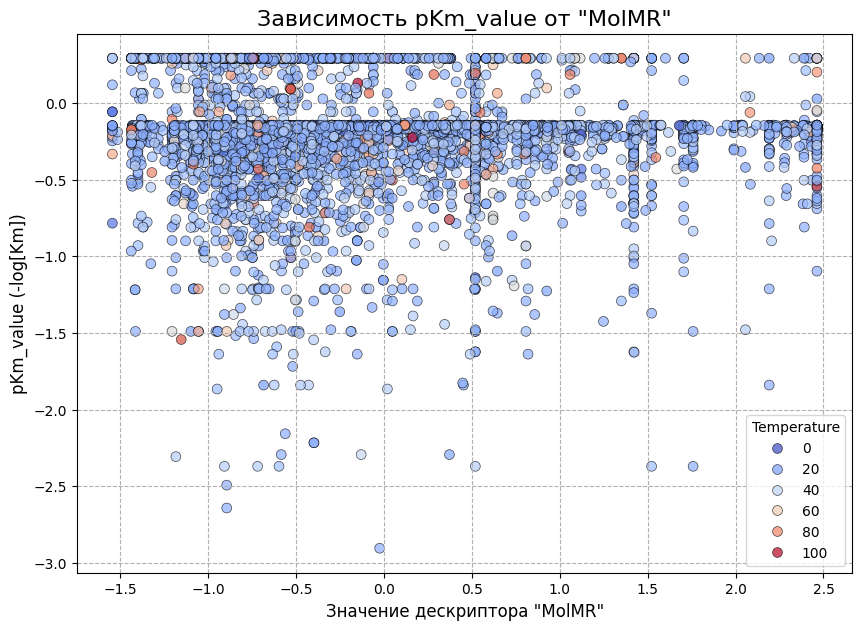

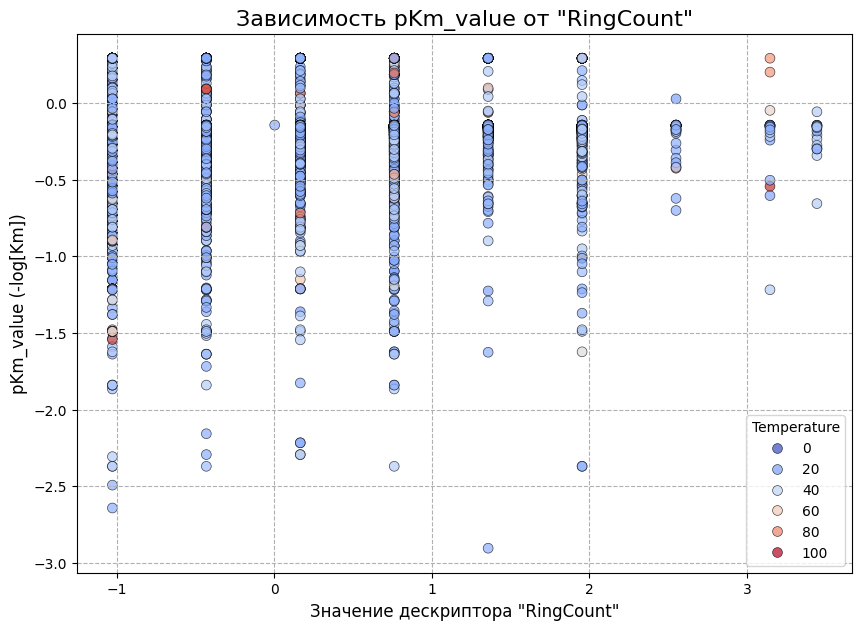

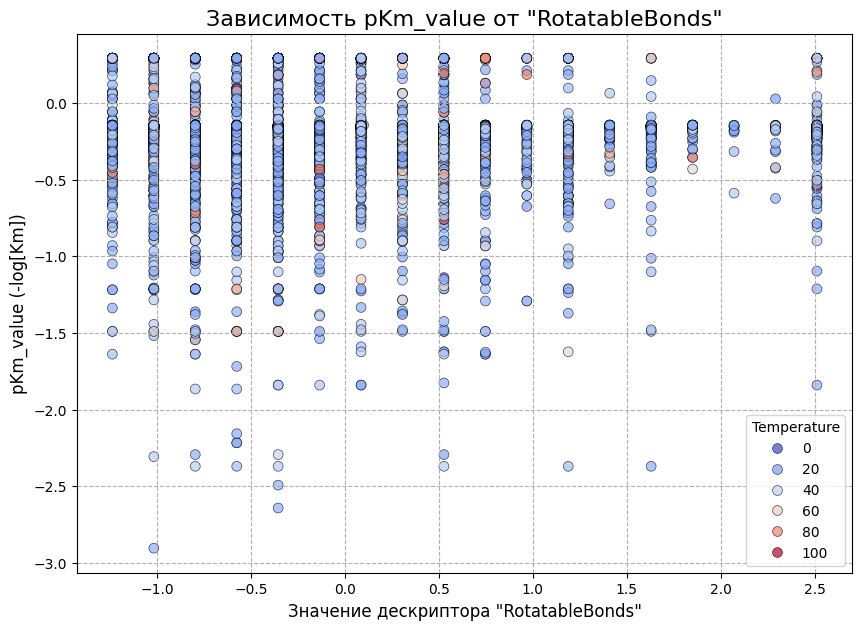

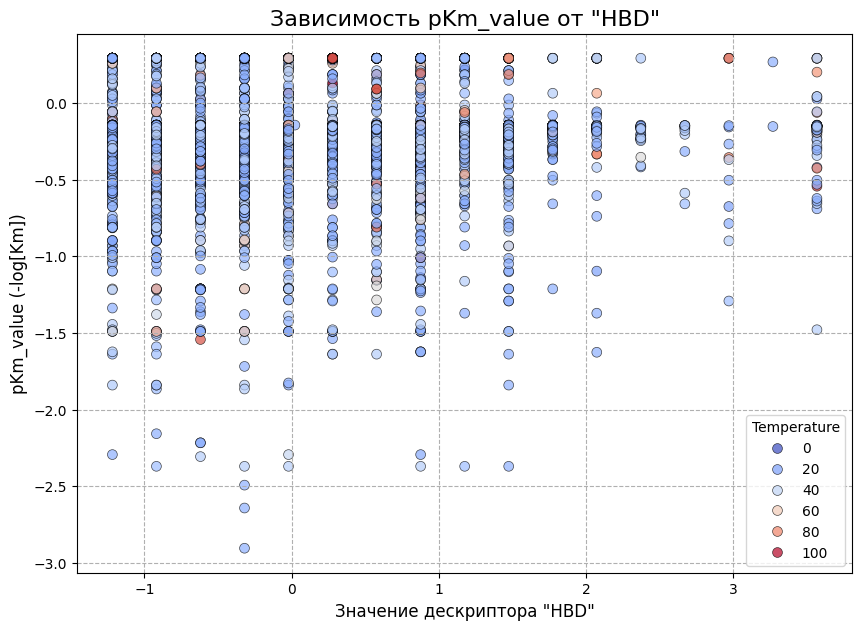

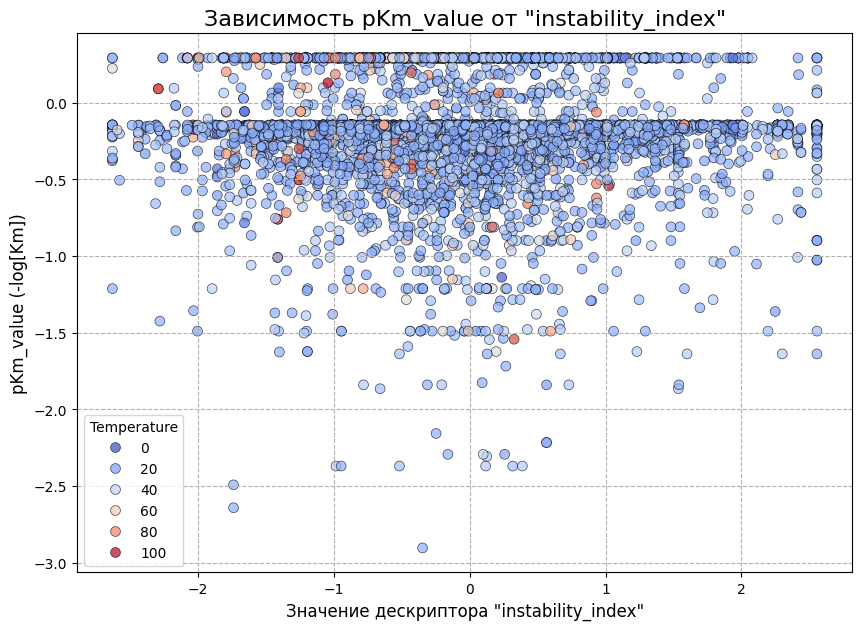

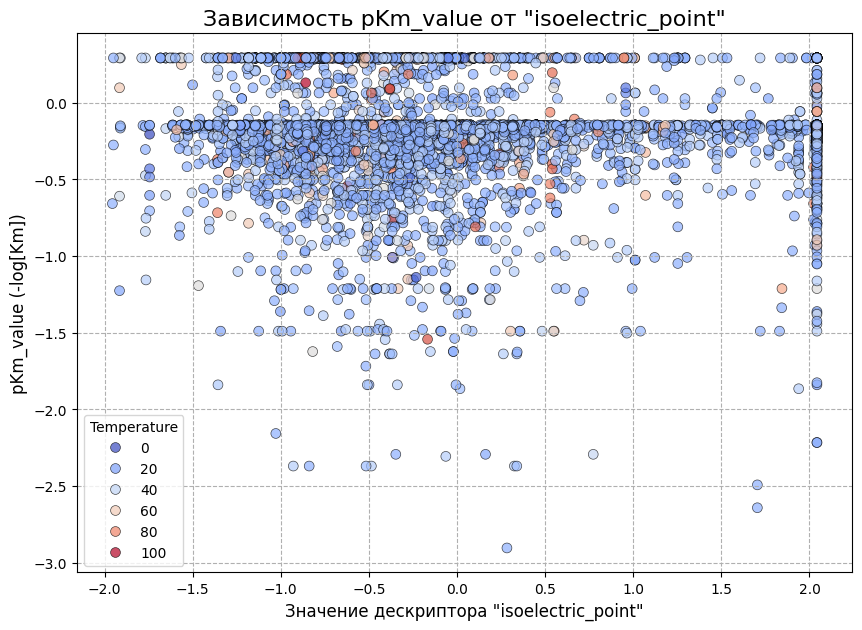

In [7]:
key_descriptors_to_plot = [
    'MolMR',
    'RingCount',
    'RotatableBonds',
    'HBD',
    'instability_index',
    'isoelectric_point'
]

# Выбираем переменную для цветового кодирования.
# 'Temperature' - отличный выбор. 'pH' - хорошая альтернатива.
color_variable = 'Temperature'

# Целевая переменная для оси Y
target_variable = 'pKm_value' # Рекомендуется для лучшей визуализации

# --- 2. Построение графиков в цикле ---

print(f"--- Построение зависимости '{target_variable}' от дескрипторов (цвет по '{color_variable}') ---")

for descriptor in key_descriptors_to_plot:
    # Проверяем, что все нужные столбцы существуют в DataFrame
    required_cols = [descriptor, target_variable, color_variable]
    if not all(col in df4.columns for col in required_cols):
        print(f"\nПропуск '{descriptor}': один из столбцов {required_cols} не найден.")
        continue

    plt.figure(figsize=(10, 7))

    # Создаем диаграмму рассеяния
    sns.scatterplot(
        data=df4,
        x=descriptor,
        y=target_variable,
        hue=color_variable,    # Параметр для цветового кодирования
        palette='coolwarm',     # Цветовая схема (показывает отклонения от среднего)
        alpha=0.7,             # Прозрачность точек
        s=50,                  # Размер точек
        edgecolor='black',     # Обводка для лучшей читаемости
        linewidth=0.5
    )

    plt.title(f'Зависимость {target_variable} от "{descriptor}"', fontsize=16)
    plt.xlabel(f'Значение дескриптора "{descriptor}"', fontsize=12)
    plt.ylabel(f'{target_variable} (-log[Km])', fontsize=12)
    plt.grid(True, which="both", ls="--")
    plt.legend(title=color_variable)

    plt.show()

In [8]:
file_url = "/content/drive/MyDrive/GDSC_dataset/df2 (1).csv"
df3 = pd.read_csv(file_url)
df3

,EC_number,Substrate,UniProt_ID,Protein_file,Organism_name,Km_value (mM),pH,Temperature,Site_type,Substrate_SMILES,...,AACount_S,AACount_T,AACount_V,AACount_W,AACount_Y,size_ratio,flexibility_ratio,aromatic_match,hb_potential,hydrophobic_match
0,1.1.1.1,octanal,P00326,1U3W.pdb,Homo sapiens,9.6000,-----,21-23°C,Substrate+Cofactor,C(CCCCCCC)=O,...,48,44,78,4,8,0.000497,0.008021,0.0,0.0,0.007783
1,1.1.1.1,NADH,P39462,1R37.pdb,Saccharolobus solfataricus,0.0400,-----,55°C,Substrate+Cofactor,C1C=CN(C=C1C(=O)N)C2C(C(C(O2)COP(=O)(O)OP(=O)(...,...,28,26,72,4,26,0.001888,0.015850,84.0,144.0,0.000052
2,1.1.1.1,NADH,P39462,1R37.pdb,Saccharolobus solfataricus,0.0100,10.5,65°C,Substrate+Cofactor,C1C=CN(C=C1C(=O)N)C2C(C(C(O2)COP(=O)(O)OP(=O)(...,...,28,26,72,4,26,0.001888,0.015850,84.0,144.0,0.000052
3,1.1.1.1,benzaldehyde,P39462,1R37.pdb,Saccharolobus solfataricus,0.0300,10.5,65°C,Substrate+Cofactor,C(C1=CC=CC=C1)=O,...,28,26,72,4,26,0.000424,0.001441,42.0,0.0,0.000925
4,1.1.1.1,Cyclohexanol,P39462,1R37.pdb,Saccharolobus solfataricus,0.0300,10.5,65°C,Substrate+Cofactor,C1(CCCCC1)O,...,28,26,72,4,26,0.000387,0.000000,0.0,1.0,0.000787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5582,6.4.1.2,ATP,Q00955,5CSL.pdb,Saccharomyces cerevisiae,0.0530,7.5,-----,Substrate+Cofactor,C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(O)OP(...,...,255,213,292,48,128,0.000206,0.001941,704.0,98.0,-0.000901
5583,6.4.1.3,propionyl-CoA,Q9X4K7,1XNY.pdb,Streptomyces coelicolor,0.0760,7.6,30°C,Substrate+Cofactor,C(CC)(=O)SCCNC(CCNC([C@@H](C(COP(OP(OC[C@@H]1[...,...,42,68,94,2,26,0.001581,0.019194,148.0,171.0,-0.000362
5584,6.4.1.3,butyryl-CoA,Q9X4K7,1XNY.pdb,Streptomyces coelicolor,0.1040,7.6,30°C,Substrate+Cofactor,C(CCC)(=O)SCCNC(CCNC([C@@H](C(COP(OP(OC[C@@H]1...,...,42,68,94,2,26,0.001622,0.020154,148.0,171.0,-0.000362
5585,6.5.1.1,ATP,A0A0A6YVN6,4D05.pdb,Psychromonas sp. SP041,0.0038,-----,30°C,Substrate_only,C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(O)OP(...,...,26,40,26,8,19,0.001705,0.016227,110.0,98.0,-0.001584


In [10]:
df3

,EC_number,Substrate,UniProt_ID,Protein_file,Organism_name,Km_value (mM),pH,Temperature,Site_type,Substrate_SMILES,...,AACount_S,AACount_T,AACount_V,AACount_W,AACount_Y,size_ratio,flexibility_ratio,aromatic_match,hb_potential,hydrophobic_match
0,1.1.1.1,octanal,P00326,1U3W.pdb,Homo sapiens,9.6000,-----,21-23°C,Substrate+Cofactor,C(CCCCCCC)=O,...,48,44,78,4,8,0.000497,0.008021,0.0,0.0,0.007783
1,1.1.1.1,NADH,P39462,1R37.pdb,Saccharolobus solfataricus,0.0400,-----,55°C,Substrate+Cofactor,C1C=CN(C=C1C(=O)N)C2C(C(C(O2)COP(=O)(O)OP(=O)(...,...,28,26,72,4,26,0.001888,0.015850,84.0,144.0,0.000052
2,1.1.1.1,NADH,P39462,1R37.pdb,Saccharolobus solfataricus,0.0100,10.5,65°C,Substrate+Cofactor,C1C=CN(C=C1C(=O)N)C2C(C(C(O2)COP(=O)(O)OP(=O)(...,...,28,26,72,4,26,0.001888,0.015850,84.0,144.0,0.000052
3,1.1.1.1,benzaldehyde,P39462,1R37.pdb,Saccharolobus solfataricus,0.0300,10.5,65°C,Substrate+Cofactor,C(C1=CC=CC=C1)=O,...,28,26,72,4,26,0.000424,0.001441,42.0,0.0,0.000925
4,1.1.1.1,Cyclohexanol,P39462,1R37.pdb,Saccharolobus solfataricus,0.0300,10.5,65°C,Substrate+Cofactor,C1(CCCCC1)O,...,28,26,72,4,26,0.000387,0.000000,0.0,1.0,0.000787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5582,6.4.1.2,ATP,Q00955,5CSL.pdb,Saccharomyces cerevisiae,0.0530,7.5,-----,Substrate+Cofactor,C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(O)OP(...,...,255,213,292,48,128,0.000206,0.001941,704.0,98.0,-0.000901
5583,6.4.1.3,propionyl-CoA,Q9X4K7,1XNY.pdb,Streptomyces coelicolor,0.0760,7.6,30°C,Substrate+Cofactor,C(CC)(=O)SCCNC(CCNC([C@@H](C(COP(OP(OC[C@@H]1[...,...,42,68,94,2,26,0.001581,0.019194,148.0,171.0,-0.000362
5584,6.4.1.3,butyryl-CoA,Q9X4K7,1XNY.pdb,Streptomyces coelicolor,0.1040,7.6,30°C,Substrate+Cofactor,C(CCC)(=O)SCCNC(CCNC([C@@H](C(COP(OP(OC[C@@H]1...,...,42,68,94,2,26,0.001622,0.020154,148.0,171.0,-0.000362
5585,6.5.1.1,ATP,A0A0A6YVN6,4D05.pdb,Psychromonas sp. SP041,0.0038,-----,30°C,Substrate_only,C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(O)OP(...,...,26,40,26,8,19,0.001705,0.016227,110.0,98.0,-0.001584


Исходный размер данных: 5587 строк
Размер данных после фильтрации по 5 EC-классам: 39 строк


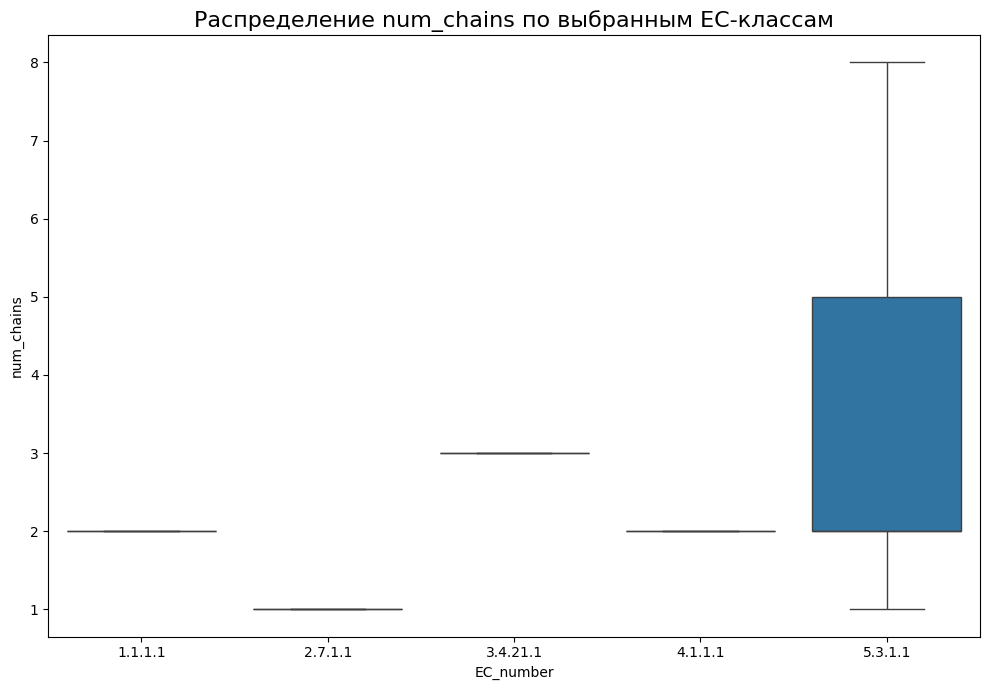

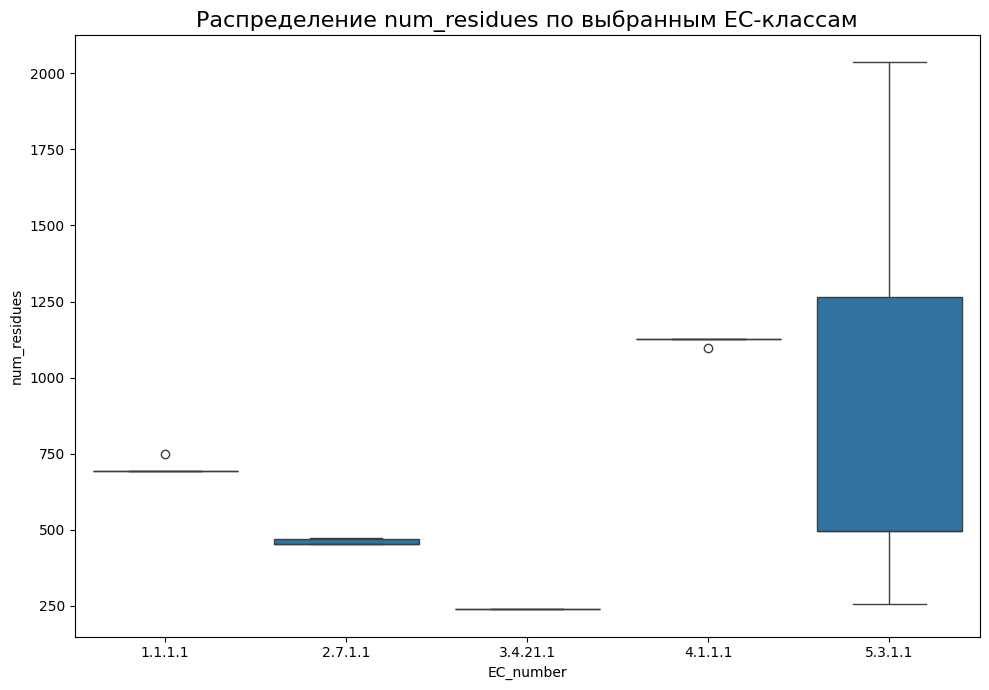

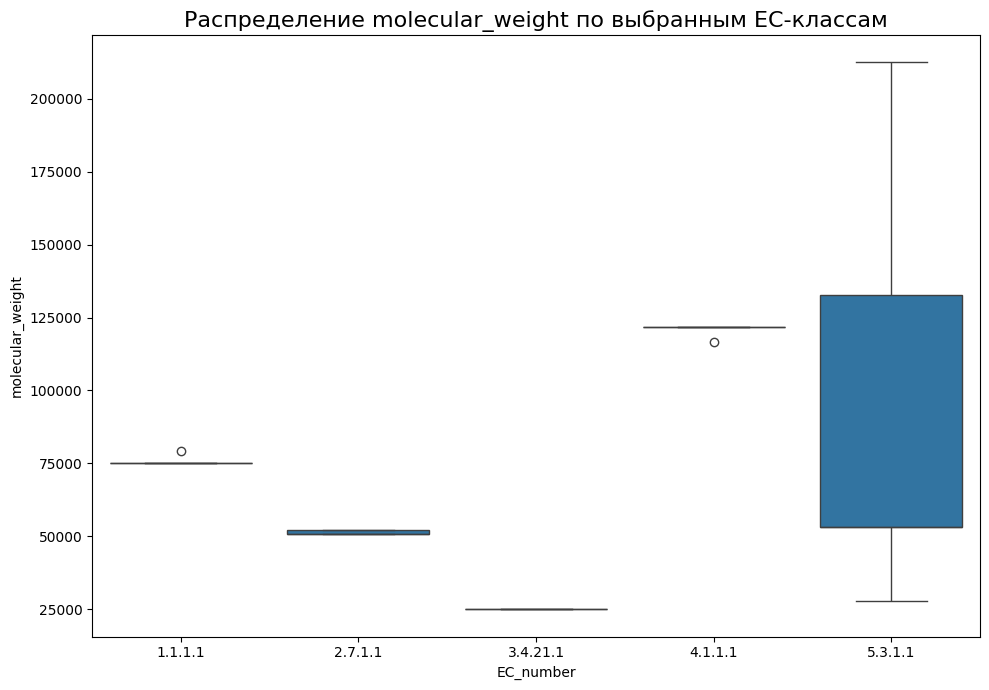

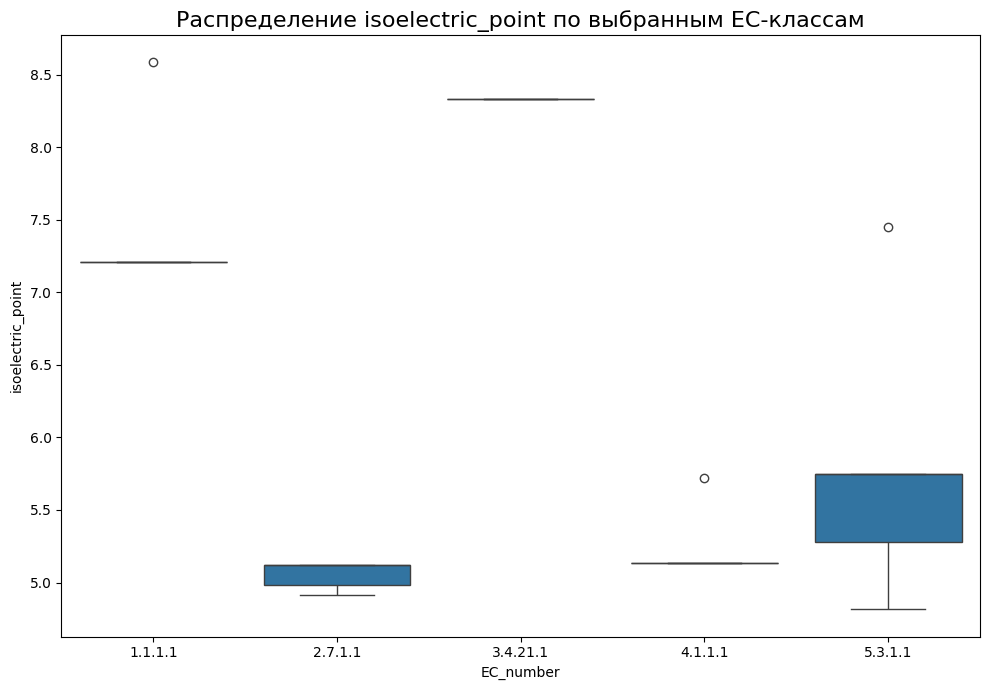

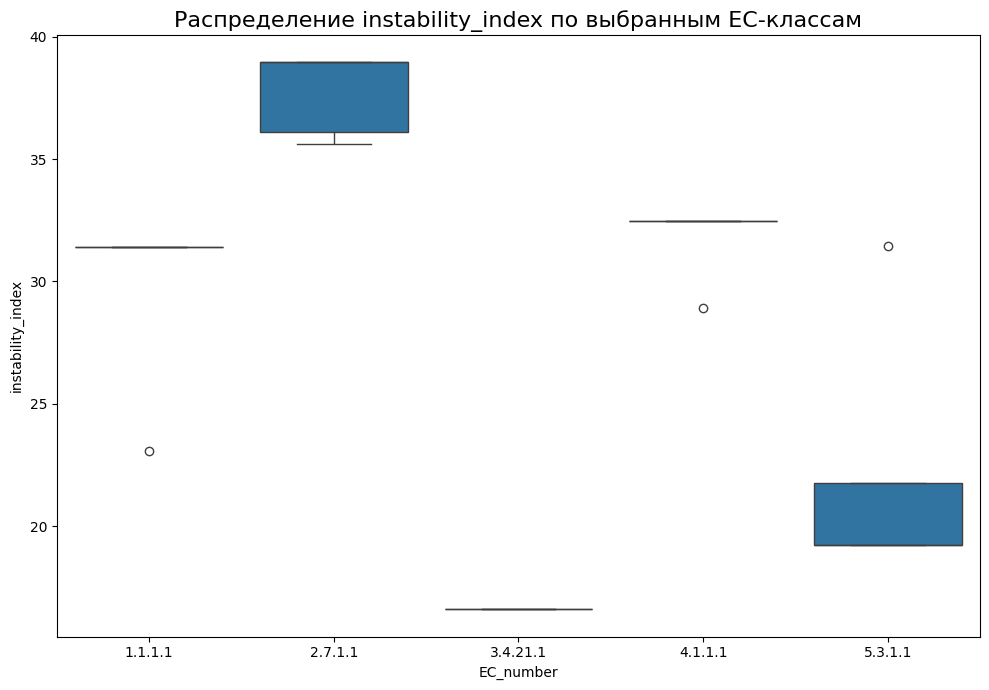

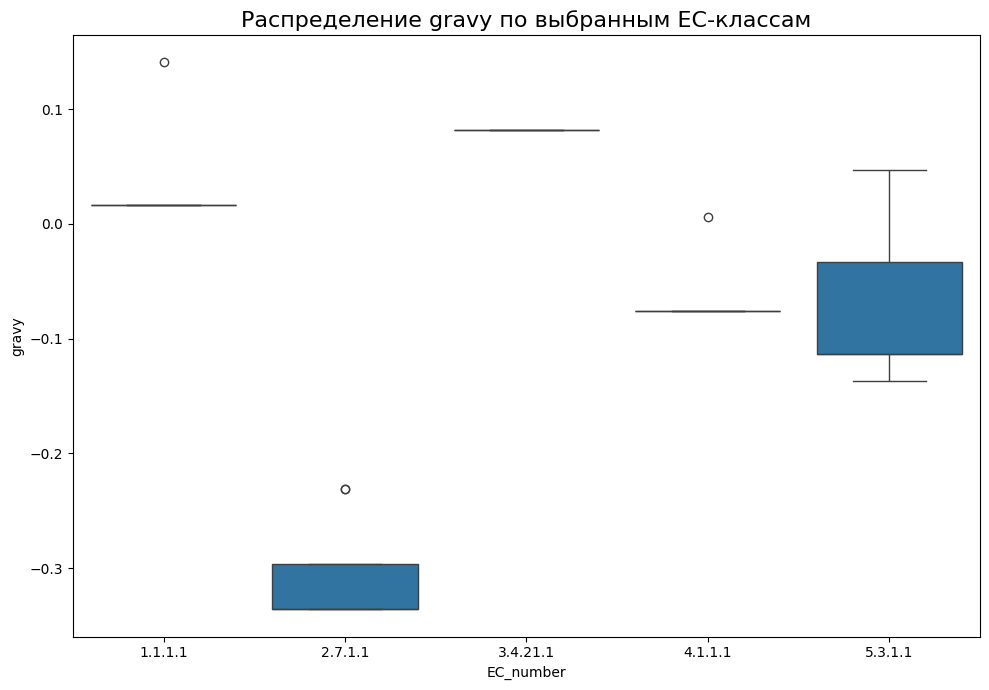

In [16]:
ec_classes_to_plot = [
    '1.1.1.1',
    '2.7.1.1',
    '3.4.21.1',
    '4.1.1.1',
    '5.3.1.1'
]
df_filtered = df3[df3['EC_number'].isin(ec_classes_to_plot)]

print(f"Исходный размер данных: {len(df3)} строк")
print(f"Размер данных после фильтрации по 5 EC-классам: {len(df_filtered)} строк")


y_columns = ['num_chains', 'num_residues', 'molecular_weight', 'isoelectric_point', 'instability_index', 'gravy']

for column in y_columns:
    plt.figure(figsize=(10, 7))


    g = sns.boxplot(
        data=df_filtered,
        x="EC_number",
        y=column,
    )

    g.set_title(f'Распределение {column} по выбранным EC-классам', fontsize=16)

    plt.tight_layout()
    plt.show()

Произвели визуализацию распределение белковых характеристик по EC-классам.
Индекс нестабильности сильно зависит от функционального класса фермента.  Физико-химические свойства белка (размер, стабильность, заряд) напрямую зависят от его биохимической функции (EC-класса).

